# Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Reading and Understanding the Data

In [17]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

#For Visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes()
# plt.style.use('fivethirtyeight')


#Linear regression
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Reading the dataset
car = pd.read_csv('CarPrice_Assignment.csv')

In [19]:
# Checking few rows of the dataset to get its feel
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Understanding the dataframe

In [20]:
car.shape

(205, 26)

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
# Checking for missing value
null_values = round(car.isnull().sum()/len(car.index) *100,2)
null_values.sort_values(ascending = False)

car_ID              0.0
symboling           0.0
highwaympg          0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
stroke              0.0
boreratio           0.0
fuelsystem          0.0
enginesize          0.0
cylindernumber      0.0
enginetype          0.0
curbweight          0.0
carheight           0.0
carwidth            0.0
carlength           0.0
wheelbase           0.0
enginelocation      0.0
drivewheel          0.0
carbody             0.0
doornumber          0.0
aspiration          0.0
fueltype            0.0
CarName             0.0
price               0.0
dtype: float64

In [23]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [24]:
car.describe(include = ['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [25]:
car['carbody'] = car['carbody'].astype(object)
car['symboling'] = car['symboling'].astype(object)

In [26]:
# Handling the delimiters
car[['make','car_model']] = car["CarName"].str.split(" ", 1, expand=True)

# Removing the CarName ,'and car_model colum
car = car.drop(['CarName','car_model'],axis =1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [27]:
car.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [28]:
car['make'] = car['make'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

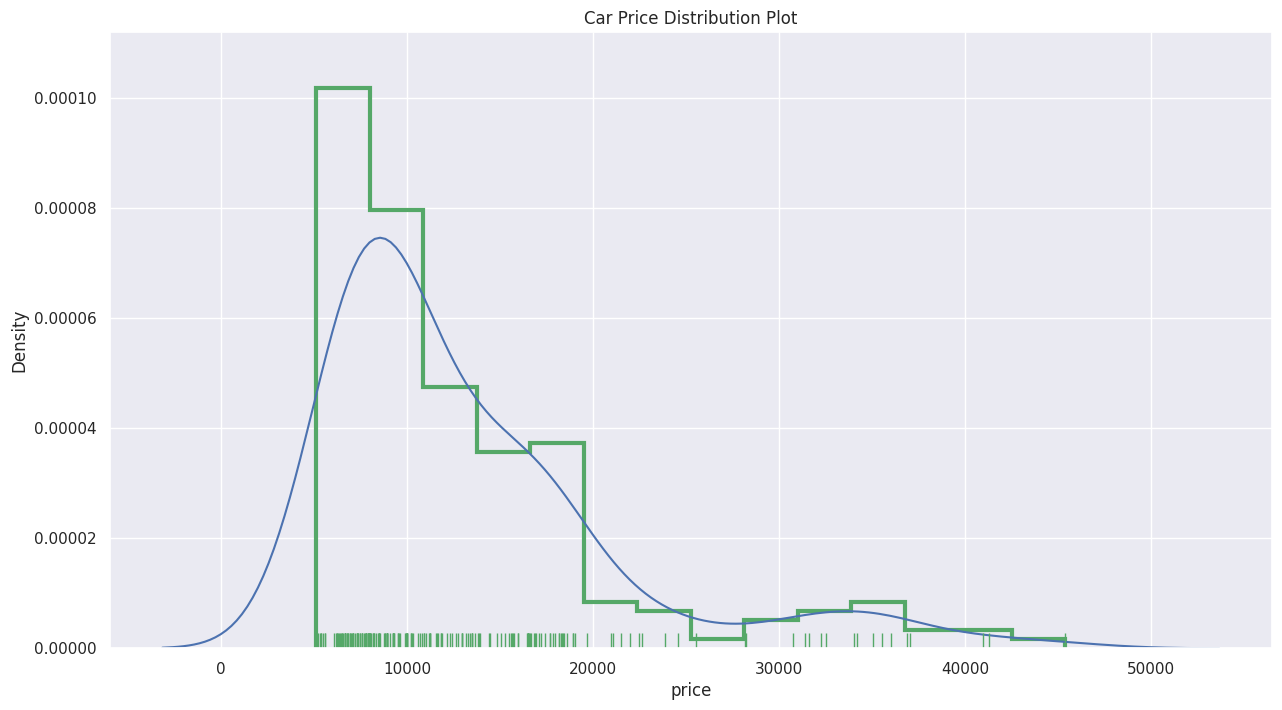

In [29]:
plt.figure(figsize=(15,8))

# plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')

# sns.distplot(car.price, rug=True, color="y")
sns.distplot(car.price, rug=True, rug_kws={"color": "g"},
            hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

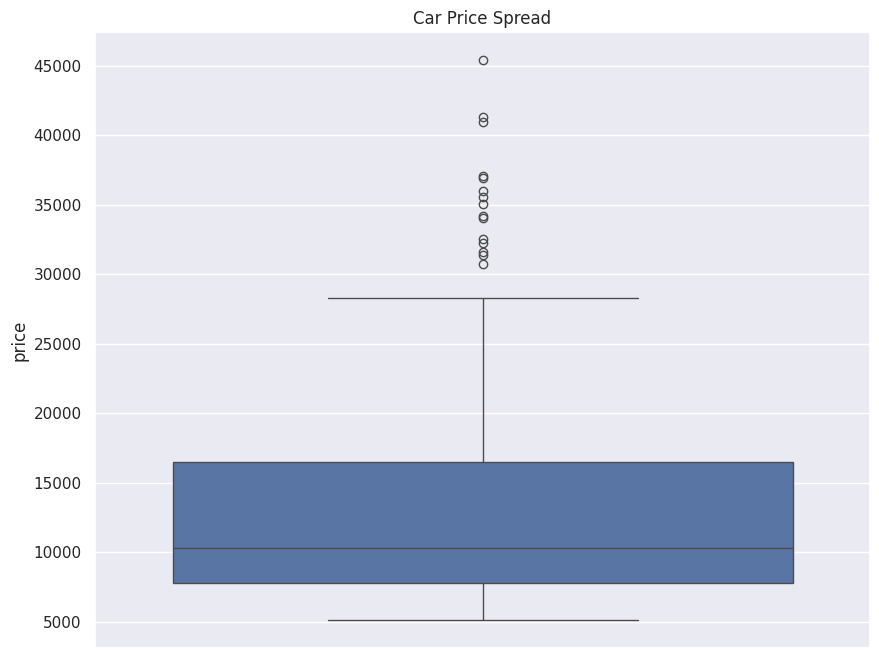

In [30]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=car.price)

plt.show()

In [31]:
car['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [32]:
# Segregating data according to datatypes
car_obj = car.select_dtypes(include = 'object')
car_obj.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,make
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [33]:
car_obj.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'make'],
      dtype='object')

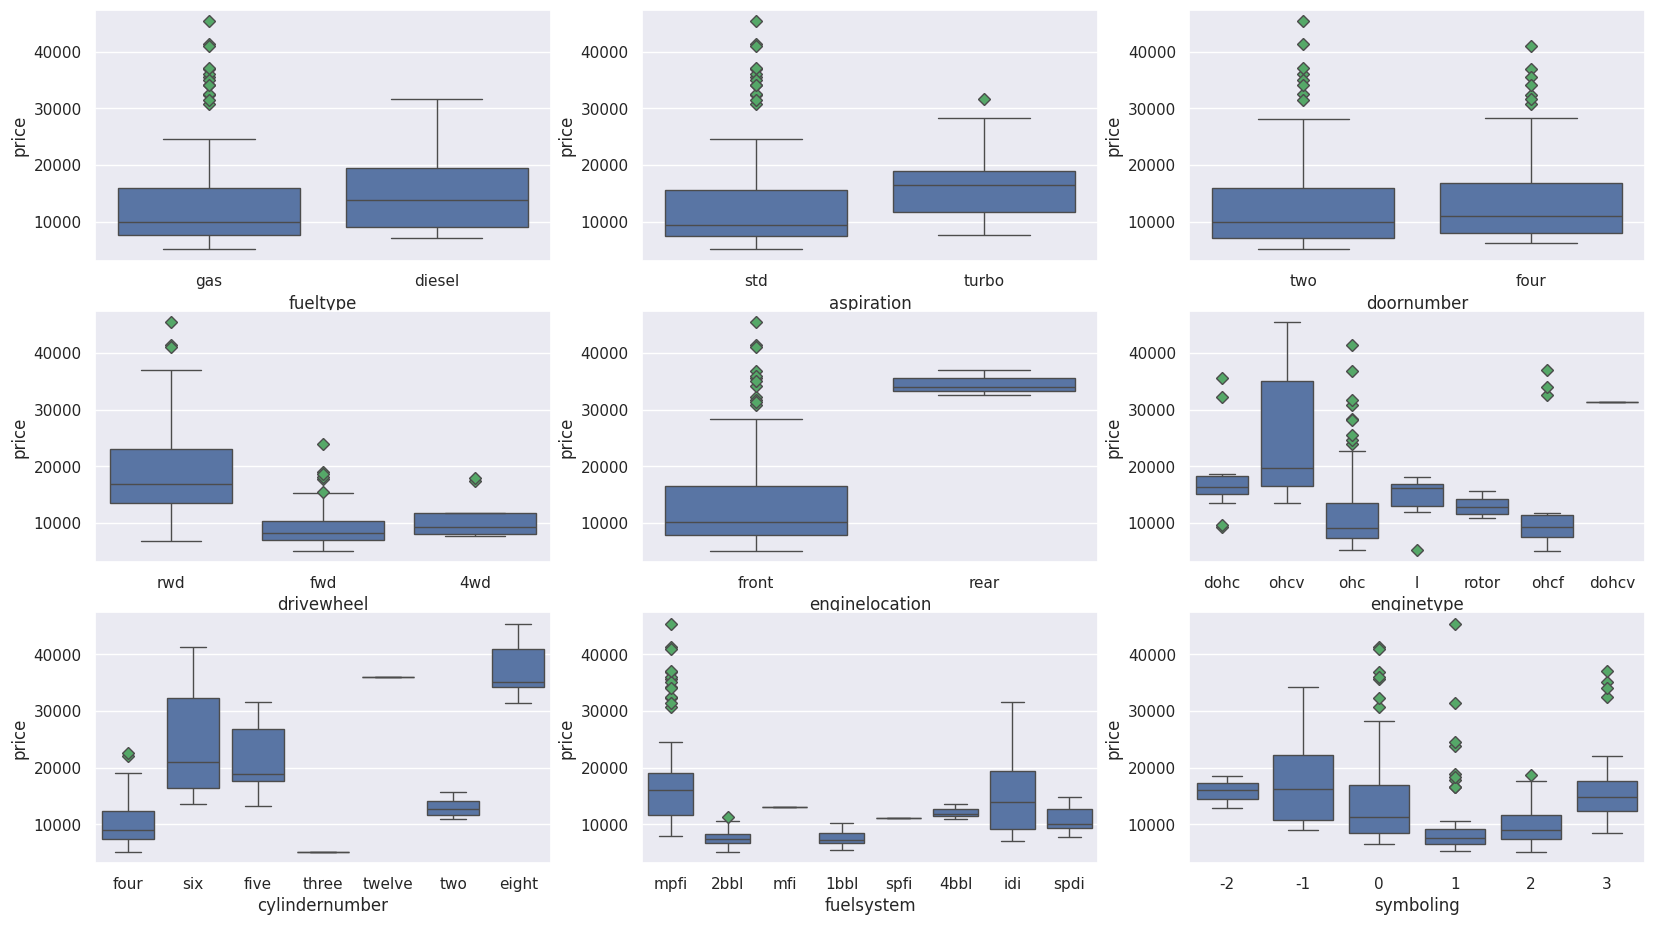

In [34]:
plt.figure(figsize =(20,15))
green_diamond = dict(markerfacecolor='g', marker='D')

plt.subplot(4,3, 1)
sns.boxplot(y='price', x='fueltype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 2)
sns.boxplot(y='price', x='aspiration', data= car, flierprops=green_diamond)

plt.subplot(4,3, 3)
sns.boxplot(y='price', x='doornumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 4)
sns.boxplot(y='price', x='drivewheel', data= car, flierprops=green_diamond)

plt.subplot(4,3, 5)
sns.boxplot(y='price', x='enginelocation', data= car, flierprops=green_diamond)

plt.subplot(4,3, 6)
sns.boxplot(y='price', x='enginetype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 7)
sns.boxplot(y='price', x='cylindernumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 8)
sns.boxplot(y='price', x='fuelsystem', data= car, flierprops=green_diamond)

plt.subplot(4,3, 9)
sns.boxplot(y='price', x='symboling', data= car, flierprops=green_diamond)

plt.show()

<Figure size 1500x1000 with 0 Axes>

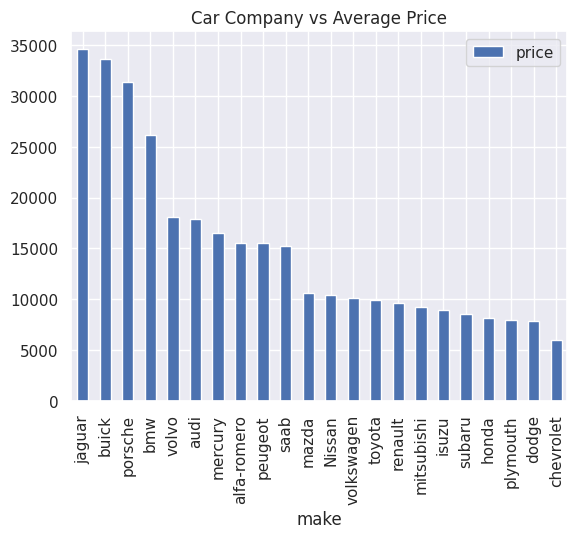

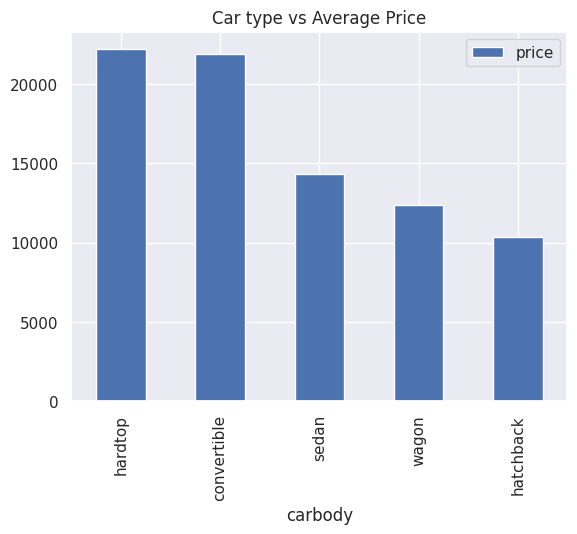

In [35]:
make_gp = car.pivot_table(values = 'price', index = 'make',aggfunc ='mean').sort_values(by ='price', ascending = False)
body_gp = car.pivot_table(values = 'price', index = 'carbody',aggfunc ='mean').sort_values(by ='price', ascending = False)


plt.figure(figsize=(15,10))

make_gp.plot.bar()
plt.title('Car Company vs Average Price')

body_gp.plot.bar()
plt.title('Car type vs Average Price')

plt.show()

In [36]:
# Segregating data according to datatype
car_num = car.select_dtypes(exclude = 'object')
car_num.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
# Removing unnecessary column
car_num= car_num.drop('car_ID',axis=1)

In [38]:
# Observing the correlation among these numerical predictor variables
car_num.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


In [41]:
# Let us observe the correlation among these variables
car_dim = ['carlength','carwidth','carheight','curbweight','wheelbase','price']
car[car_dim].corr()

,carlength,carwidth,carheight,curbweight,wheelbase,price
carlength,1.000000,0.841118,0.491029,0.877728,0.874587,0.682920
carwidth,0.841118,1.000000,0.279210,0.867032,0.795144,0.759325
carheight,0.491029,0.279210,1.000000,0.295572,0.589435,0.119336
curbweight,0.877728,0.867032,0.295572,1.000000,0.776386,0.835305
wheelbase,0.874587,0.795144,0.589435,0.776386,1.000000,0.577816
price,0.682920,0.759325,0.119336,0.835305,0.577816,1.000000


In [43]:
car_num.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [44]:
# Let us observe the correlation among these variables
car_features = ['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
car[car_features].corr()

,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


<Axes: >

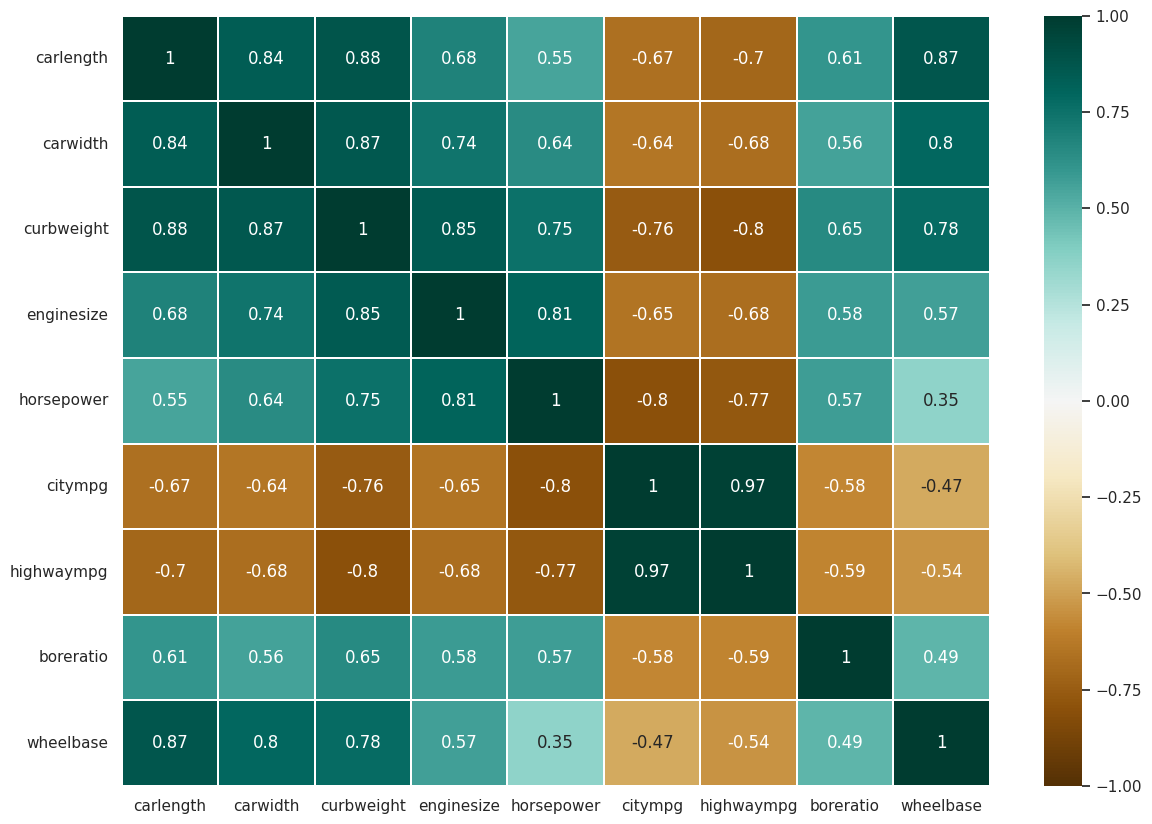

In [45]:
plt.figure(figsize = (14,10))

num_features = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio','wheelbase']
sns.heatmap(car[num_features].corr(), annot = True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
# cmap = 'Blues'

In [46]:
car_lm = car[['symboling','fueltype','aspiration','drivewheel','carbody','cylindernumber',
                'enginetype','enginelocation','carlength','carwidth','curbweight','enginesize','horsepower','citympg',
                'highwaympg','boreratio','wheelbase','make','price']]
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,make,price
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,13495.0
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,16500.0
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero,16500.0
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi,13950.0
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi,17450.0


In [47]:
car_lm.shape

(205, 19)

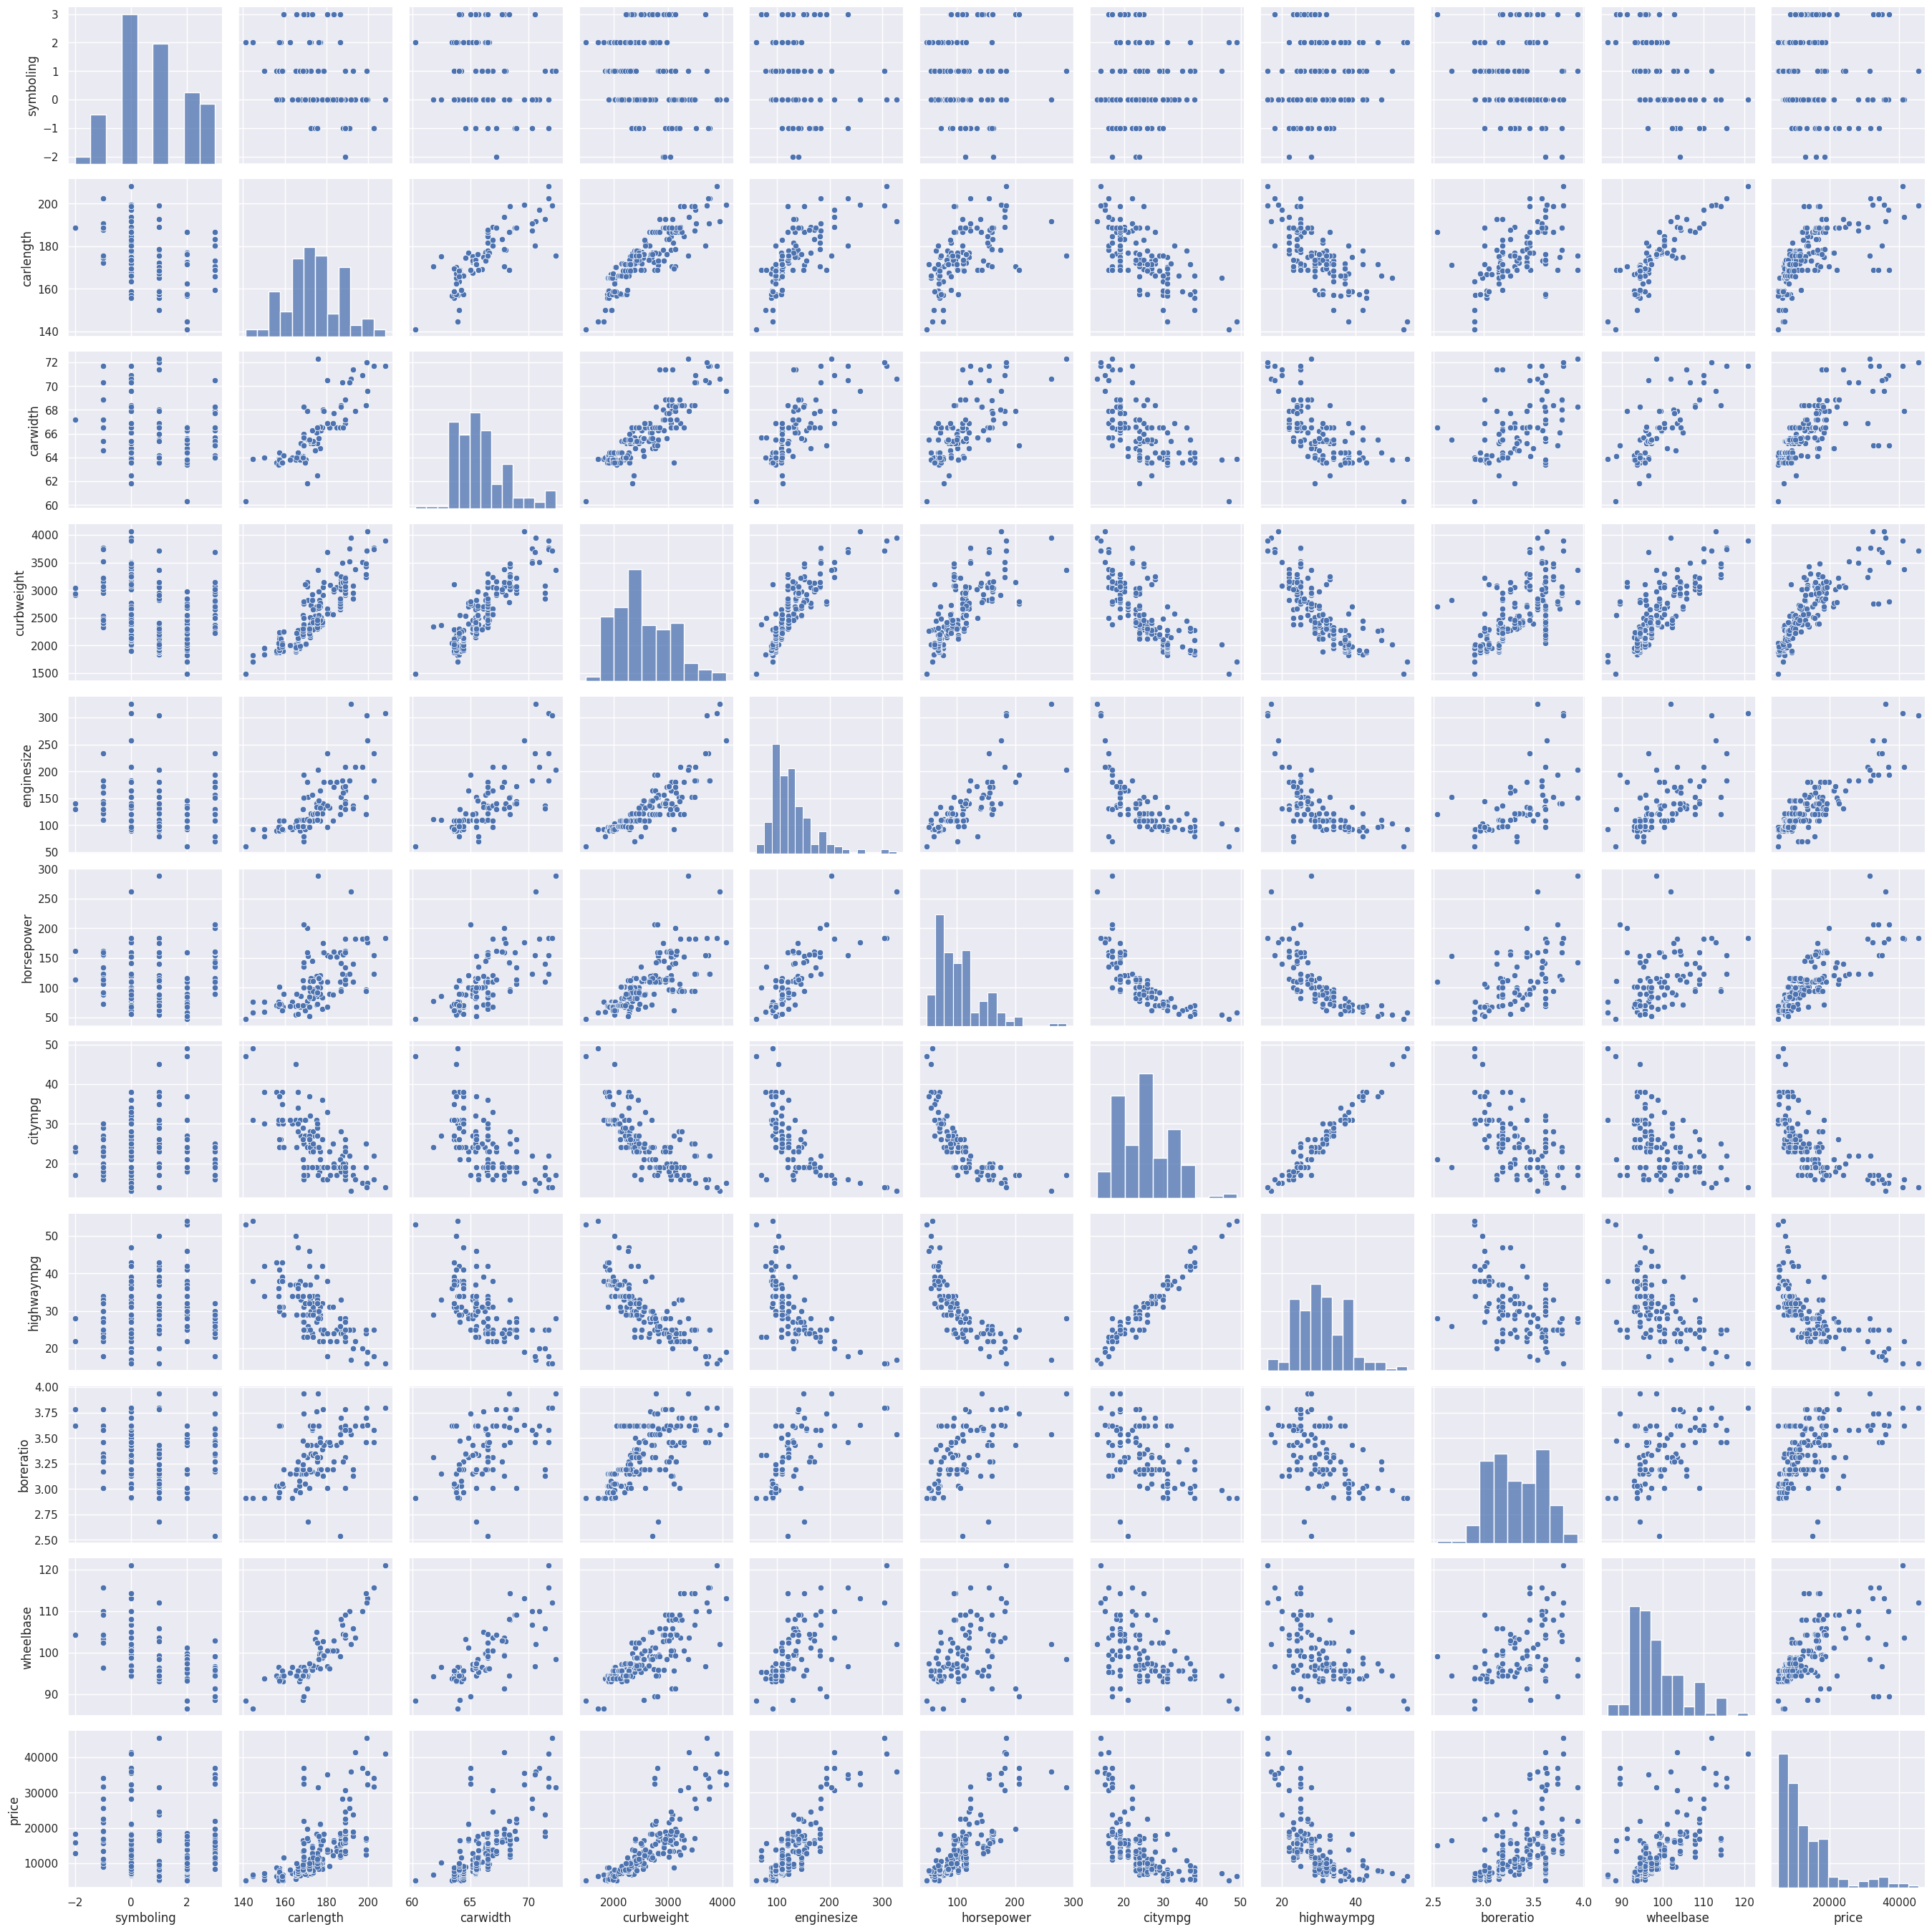

In [48]:
# Let us observe correlation among these selected features
sns.pairplot(car_lm , palette="dark green")
plt.show()

In [49]:
car_lm['fuel_economy'] = (0.45 * car_lm['highwaympg']) + (0.55 * car_lm['citympg'])

# dropping citympg and highwaympg from the dataset
car_lm = car_lm.drop(['citympg','highwaympg'],axis=1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,make,price,fuel_economy
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,13495.0,23.70
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,16500.0,23.70
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,alfa-romero,16500.0,22.15
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,audi,13950.0,26.70
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,audi,17450.0,19.80


In [51]:
make_gp = car_lm.merge(make_gp.reset_index(), how='left',on='make')

bins = np.linspace(min(make_gp['price-1']), max(make_gp['price-1']),4)

bin_name=['Economic','Medium','Luxury']

car_lm['class'] = pd.cut(make_gp['price-1'], bins, right=False, labels = bin_name, include_lowest = True)

# converting datatype of class to object
car_lm['class'] = car_lm['class'].astype(object)

#dropping the column make from the dataset
car_lm = car_lm.drop('make',axis =1)

car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


In [52]:
rating_dict = {-3: 0,-2:1 ,-1: 2, 0: 3,1: 4,2: 5,3: 6}

car_lm['symboling'] = car_lm['symboling'].map(rating_dict)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


In [53]:
dum = car_lm.select_dtypes(include = 'object')
dummy = pd.get_dummies(dum, prefix=["fuel","aspiration","drive","body","cylindernum","engine",
                                         "engineloc" ,'class'], drop_first = True)
dummy.head()

,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [54]:
dummy.shape

(205, 23)

In [55]:
# Add the results to the original car dataframe

car_lm = pd.concat([car_lm, dummy], axis = 1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [56]:
# drop duplicate columns
del_list = dum.columns
car_lm = car_lm.drop(del_list, axis = 1)
car_lm.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,5,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [57]:
car_lm.shape
print("Our Final dataset has",car_lm.shape[0],'number of rows')
print("Our Final dataset has",car_lm.shape[1],'number of columns')

Our Final dataset has 205 number of rows
Our Final dataset has 33 number of columns


In [58]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(car_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
# Applying scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

scaler = MinMaxScaler()
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

car_train.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
122,0.6,0.426016,0.291667,0.272692,0.139623,0.083333,0.230159,0.244828,0.068818,0.530864,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
125,1.0,0.452033,0.666667,0.500388,0.339623,0.395833,1.000000,0.272414,0.466890,0.213992,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
166,0.6,0.448780,0.308333,0.314973,0.139623,0.266667,0.444444,0.272414,0.122110,0.344307,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.450407,0.316667,0.411171,0.260377,0.262500,0.626984,0.068966,0.314446,0.244170,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,0.775610,0.575000,0.647401,0.260377,0.475000,0.746032,0.610345,0.382131,0.122085,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [60]:
# Let us observe the scaled data
car_train.describe()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.525476,0.461655,0.407878,0.241351,0.227302,0.497946,0.411141,0.219310,0.358265,0.909091,0.181818,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.006993,0.097902,0.076923
std,0.239200,0.204848,0.184517,0.211269,0.154619,0.165511,0.207140,0.205581,0.215682,0.185980,0.288490,0.387050,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.083624,0.298227,0.267406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.399187,0.304167,0.245539,0.135849,0.091667,0.305556,0.272414,0.067298,0.198903,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.502439,0.425000,0.355702,0.184906,0.191667,0.500000,0.341379,0.140343,0.344307,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.669919,0.550000,0.559542,0.301887,0.283333,0.682540,0.503448,0.313479,0.512346,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


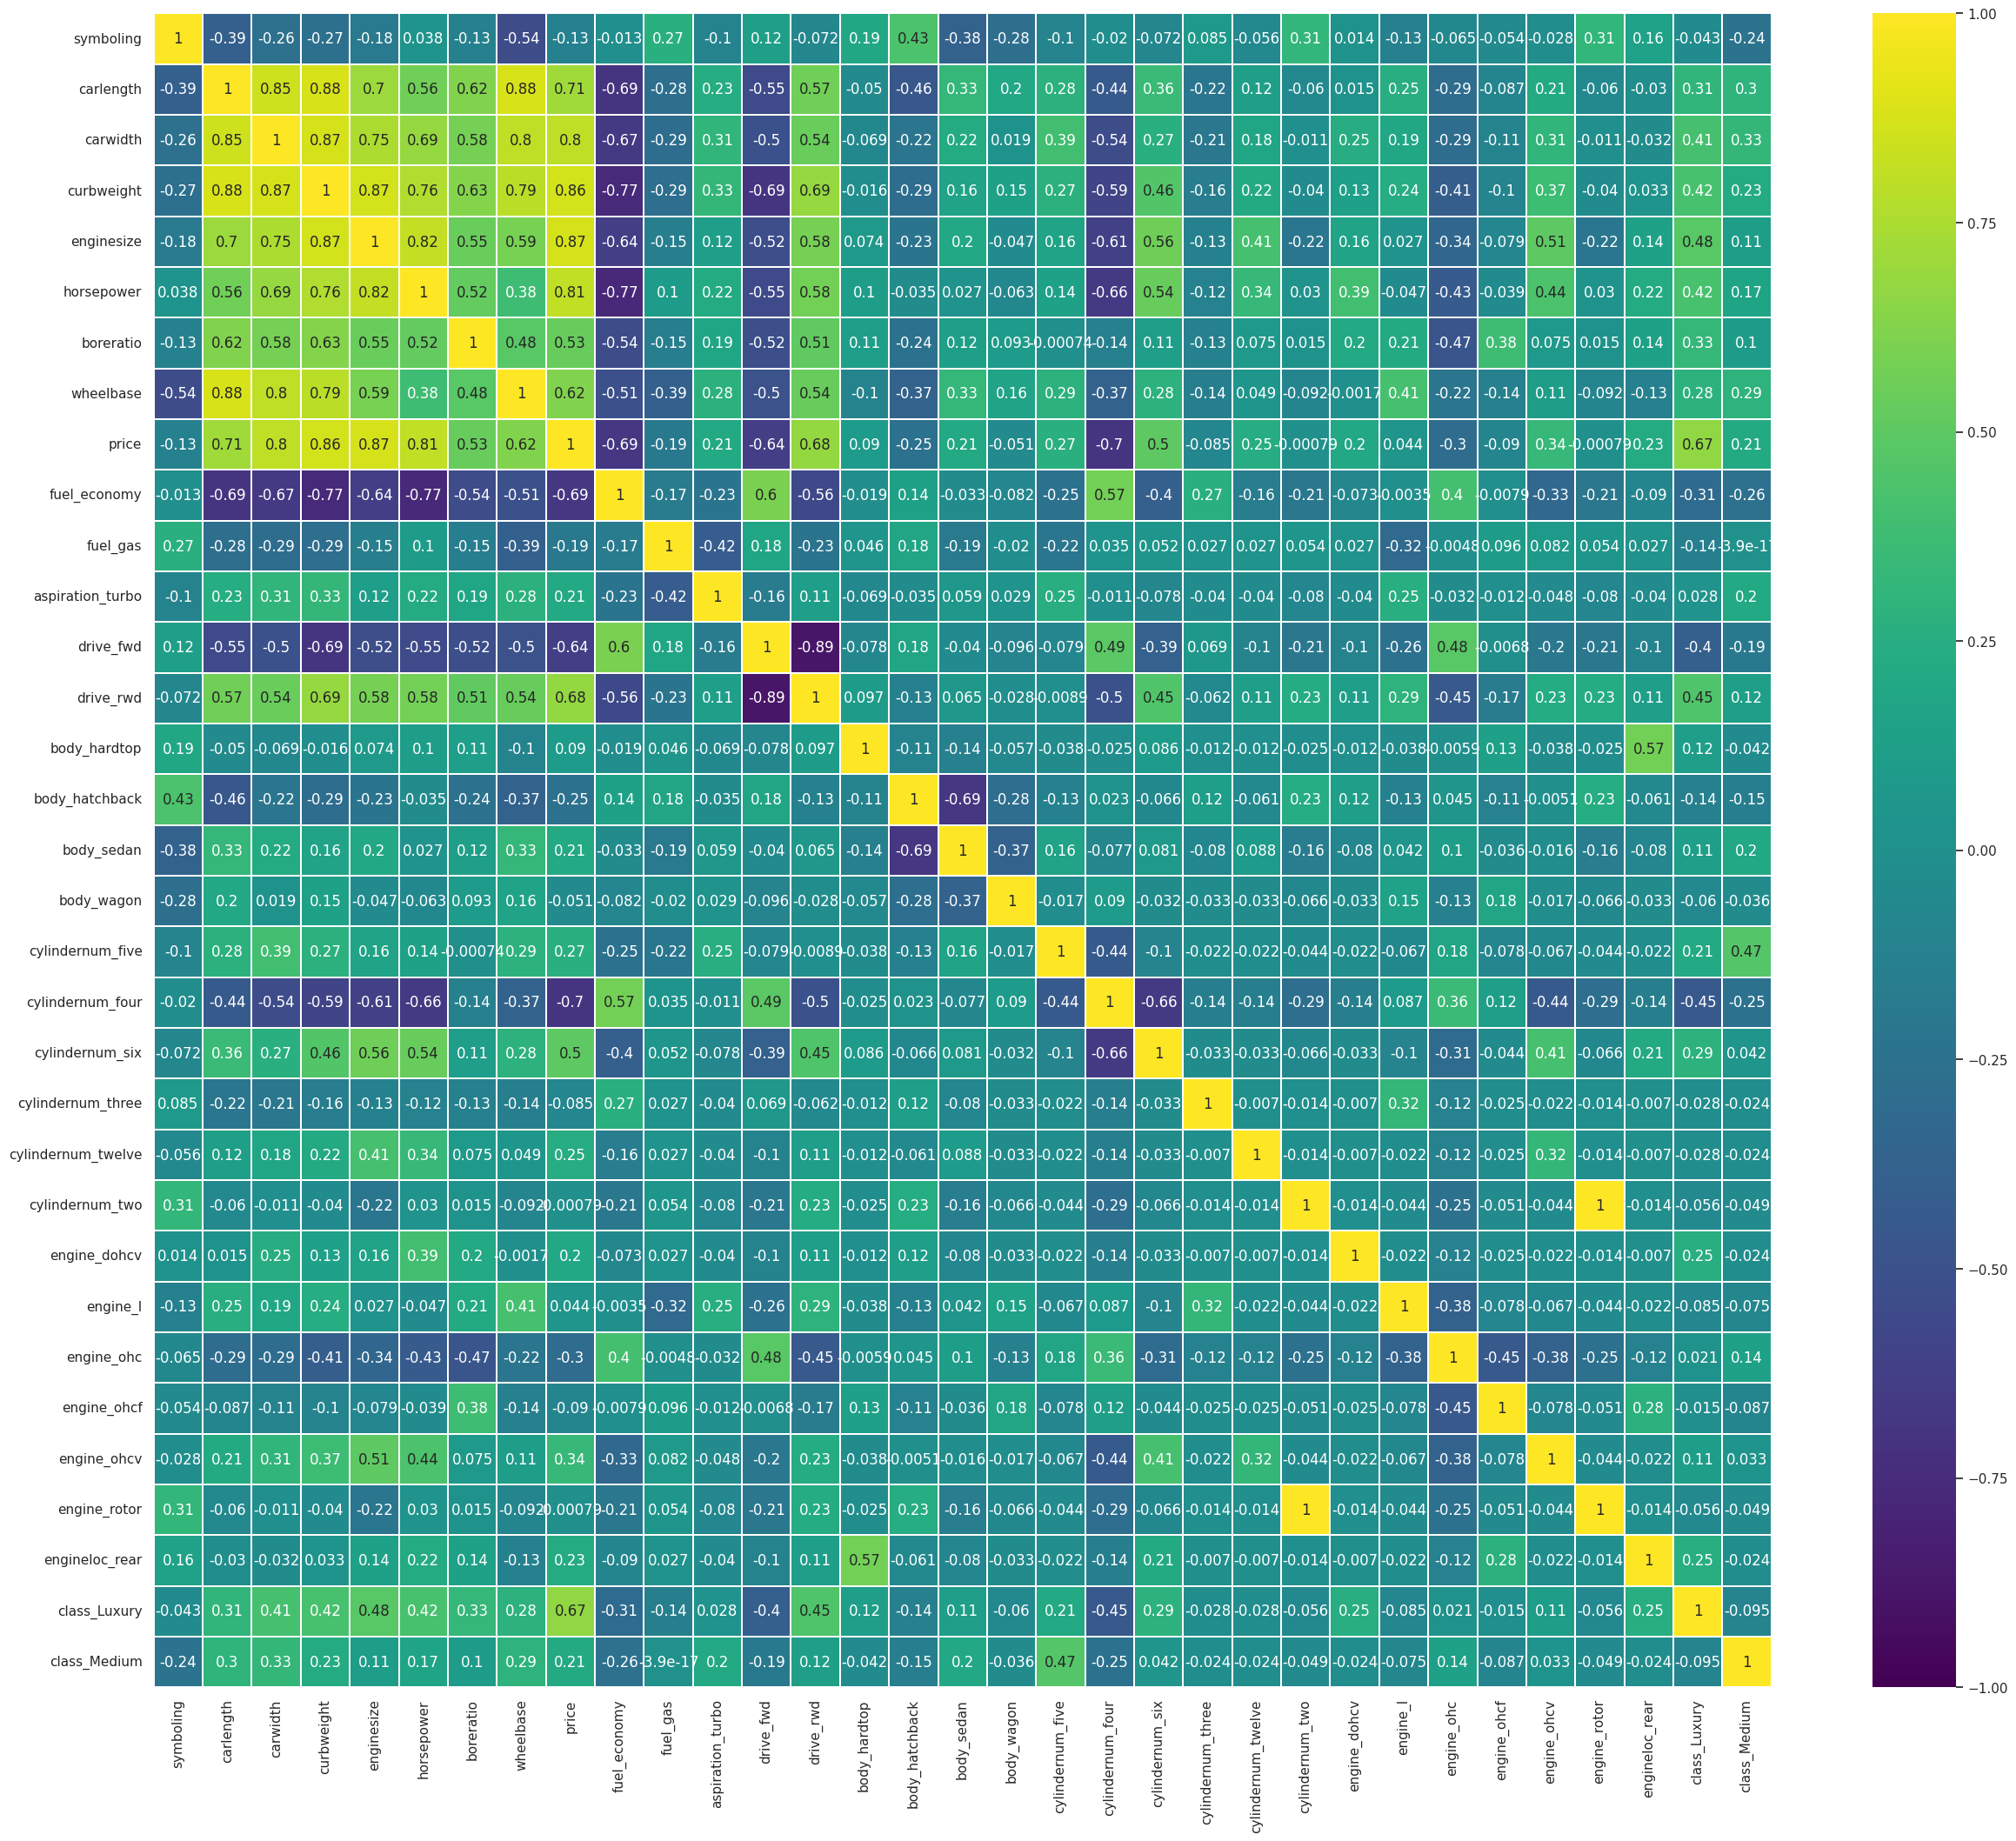

In [61]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
# sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")

sns.heatmap(car_train.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.show()

In [70]:
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

car_test[num_vars] = scaler.transform(car_test[num_vars])

In [71]:
car_test.describe()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000
mean,0.583871,0.559481,0.480376,0.428470,0.265673,0.248858,0.556580,0.437764,0.239439,0.344661,0.887097,0.177419,0.564516,0.419355,0.080645,0.338710,0.451613,0.096774,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.112903,0.129032
std,0.271724,0.189947,0.165440,0.179488,0.162820,0.163376,0.228484,0.212861,0.233076,0.175037,0.319058,0.385142,0.499868,0.497482,0.274512,0.477134,0.501716,0.298064,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.319058,0.337972
min,0.000000,0.056911,0.183333,0.128394,0.067925,0.016667,-0.111111,0.000000,0.007763,0.002743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,0.459350,0.358333,0.305275,0.177358,0.107292,0.404762,0.313793,0.092342,0.192387,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,0.547967,0.441667,0.406129,0.226415,0.218750,0.563492,0.387931,0.158991,0.326475,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.800000,0.719919,0.516667,0.564876,0.316038,0.295833,0.746032,0.570690,0.317243,0.451303,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,1.089431,0.975000,0.935609,0.932075,0.662500,0.888889,1.182759,1.112855,0.747599,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
